<a href="https://colab.research.google.com/github/nsamlani/Code_Digitization_CETESB/blob/main/Code_Digitization_CETESB/3.Image%20Classifer%20/Deployment%20of%20the%20model_per%20year/Final_Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import pandas as pd
import cv2
from sklearn.metrics import classification_report, confusion_matrix
import os
import random

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop

In [ ]:
#### file root #####
from google.colab import drive
drive.mount('/content/drive')

data_root='/basedata'

Mounted at /content/drive


In [ ]:
train_dir = f"{data_root}/train"


train_checked = [f"{train_dir}/checked/{i}" for i in os.listdir(f"{train_dir}/checked/")]
train_unchecked = [f"{train_dir}/unchecked/{i}" for i in os.listdir(f"{train_dir}/unchecked/")]

train_imgs = train_checked + train_unchecked
random.shuffle(train_imgs)

In [ ]:
len(train_imgs)

3722

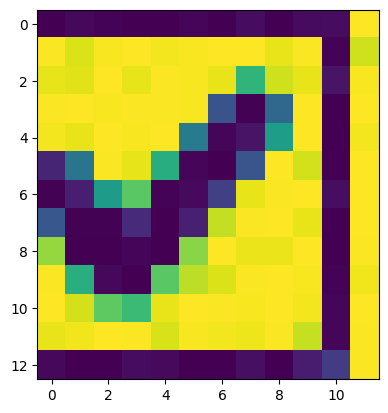

In [ ]:
# import matplotlib.image as mpimg

img = cv2.imread(train_imgs[1],0)
plt.imshow(img)


In [ ]:
########### Declarinbg image dimensions

nrows = 13
ncolumns = 13
channels = 1


In [ ]:
####### Function for reading/processing the images

def read_and_process_image(list_of_images):
  X = [] # images
  y = [] # labels
  target_size = (13,13)

  for image in list_of_images:
    img = cv2.imread(image,0)
    img_resized = cv2.resize(img, target_size)
    _, binary_img = cv2.threshold(img_resized, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Convert the binary image to a 3D tensor with a single channel
    binary_img = np.expand_dims(binary_img, axis=-1)
    binary_img = binary_img.astype(np.float64)

    X.append(binary_img)

    # get the labels

    if 'unchecked' in image:
      y.append(0)
    elif 'checked' in image:
      y.append(1)


  return X,y

In [ ]:
X_train,y_train = read_and_process_image(train_imgs)



In [ ]:
train_imgs

In [ ]:
#### Converting list to array

X_train = np.array(X_train)
y_train = np.array(y_train)


In [ ]:
X_train.shape

In [ ]:
from keras import layers
from keras import models
from keras import optimizers


batch_size = 32
############ Model #############################

model = models.Sequential()
model.add(layers.Conv2D(8,(3,3),activation = 'relu', input_shape = (13,13,1), padding = 'same'))
model.add(layers.MaxPooling2D((2,2),strides = (2,2)))

model.add(layers.Conv2D(16,(3,3),activation = 'relu', padding = 'same'))
model.add(layers.MaxPooling2D((2,2),strides = (2,2)))

model.add(layers.Conv2D(32,(3,3),activation = 'relu', padding = 'same'))
model.add(layers.MaxPooling2D((2,2),strides = (2,2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(32, activation = 'relu'))

model.add(layers.Dense(1,activation='sigmoid'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 13, 13, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 6, 6, 8)          0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 16)          1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 32)          4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 32)         0

In [ ]:
from keras import optimizers

# model.compile(
#     optimizer = tf.keras.optimizers.Adam(
#     learning_rate=0.0001),
#     loss = 'binary_crossentropy',
#     metrics = ['accuracy'])


model.compile(loss= 'binary_crossentropy',
              optimizer = optimizers.RMSprop(learning_rate=1e-5),
              metrics = ['acc'])

In [ ]:
## Creating data generators - data augmentation

# train_datagen = ImageDataGenerator(rescale = 1/255,
#                            width_shift_range=0.2,      # randomly shift the width of the image by up to 10%
#                            height_shift_range=0.2,     # randomly shift the height of the image by up to 10%)
#                            zoom_range=0.2,
#                            shear_range = 0.2,
#                            rotation_range=30,
#                            horizontal_flip = True)           # randomly zoom into the image by up to 10%


# val_datagen = ImageDataGenerator(rescale=1/255)

In [ ]:
## Creating the flow generators

# train_generator = train_datagen.flow(X_train,y_train,batch_size=batch_size)
# val_generator = val_datagen.flow(X_val,y_val,batch_size=batch_size)

In [ ]:
#### Preparing validation data

# val_dir = f"{data_root}/val"

# val_checked = [f"{val_dir}/checked/{i}" for i in os.listdir(f"{val_dir}/checked/")]
# val_unchecked = [f"{val_dir}/unchecked/{i}" for i in os.listdir(f"{val_dir}/unchecked/")]

# val_imgs = val_checked + val_unchecked
# random.shuffle(val_imgs)


# X_val,y_val = read_and_process_image(val_imgs)

# X_val = np.array(X_val)
# y_val = np.array(y_val)

In [ ]:
## Training

history = model.fit(X_train,y_train,epochs = 150)



Epoch 1/150
117/117 [==============================] - 10s 5ms/step - loss: 10.7962 - acc: 0.5140
Epoch 2/150
117/117 [==============================] - 0s 4ms/step - loss: 8.4484 - acc: 0.5465
Epoch 3/150
117/117 [==============================] - 0s 4ms/step - loss: 6.6387 - acc: 0.5948
Epoch 4/150
117/117 [==============================] - 0s 4ms/step - loss: 5.1516 - acc: 0.6330
Epoch 5/150
117/117 [==============================] - 0s 4ms/step - loss: 4.0593 - acc: 0.6698
Epoch 6/150
117/117 [==============================] - 0s 4ms/step - loss: 3.0596 - acc: 0.7233
Epoch 7/150
117/117 [==============================] - 0s 4ms/step - loss: 2.0546 - acc: 0.7781
Epoch 8/150
117/117 [==============================] - 0s 4ms/step - loss: 1.8042 - acc: 0.7910
Epoch 9/150
117/117 [==============================] - 0s 4ms/step - loss: 1.3733 - acc: 0.8189
Epoch 10/150
117/117 [==============================] - 0s 4ms/step - loss: 0.9932 - acc: 0.8598
Epoch 11/150
117/117 [===============

In [ ]:
# plt.rcParams["figure.figsize"] = (10 ,5)


# # summarize history for accuracy
# plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
# plt.title('Model Accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Training', 'Validation'], loc='lower right')
# plt.show()
# # summarize history for loss
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Training', 'Validation'], loc='upper right')
# plt.show()

In [ ]:
test_dir = f"{data_root}/test1"

test_imgs = [f"{test_dir}/{i}" for i in os.listdir(f"{test_dir}/")]
random.shuffle(test_imgs)



random.shuffle(test_imgs)
X_test, y_test = read_and_process_image(test_imgs)

In [ ]:
X_test = np.array(X_test)
y_test = np.array(y_test)


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Generate predictions
y_pred = model.predict_generator(X_test)

# Convert predictions to class labels
# y_pred_classes = np.argmax(y_pred, axis=1)
y_pred_classes = [0 if i <= 0.5 else 1 for i in y_pred]

# Compute confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred_classes)

# Print confusion matrix
print(confusion_mtx)
print('Classification Report')
# target_names = ['Not checked','checked']
print(classification_report(y_test, y_pred_classes))

In [ ]:
model.save('image_classifier.h5')